In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from scipy.stats import boxcox
import matplotlib.pyplot as plt
import seaborn as sns




In [2]:
# --- When to use Box-Cox Transformation ---
# The Box-Cox transformation is a statistical technique used to stabilize variance,
# make the data more normal distribution-like, and improve the validity of measures
# of association (like the Pearson correlation coefficient).

# --- Requirements ---
# The primary requirement is that the data must be positive (all values > 0).
# If you have negative or zero values, you can add a constant value to all data points
# to shift them into the positive range before applying the transformation.



In [3]:
# 1. Load a sample dataset
# We'll use the California Housing dataset from scikit-learn.
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
# For this example, we'll also add the target variable to the DataFrame
df['MedHouseVal'] = housing.target



In [4]:
# 2. Select a feature to work with
# Let's inspect the distribution of the 'MedInc' (Median Income) feature.
# We expect it to be right-skewed, as income data often is.
feature_name = 'MedInc'
print(f"Original skewness of '{feature_name}': {df[feature_name].skew():.2f}")



Original skewness of 'MedInc': 1.65


In [5]:
# 3. Apply the Box-Cox Transformation
# The boxcox function from scipy.stats finds the optimal lambda parameter
# that maximizes the log-likelihood function and then performs the transformation.
# It returns the transformed data and the optimal lambda.

# Create a new column for the transformed data
transformed_feature_name = f'{feature_name}_BoxCox'

# The boxcox function requires all data to be positive. Let's check.
if (df[feature_name] > 0).all():
    # Apply the transformation
    transformed_data, best_lambda = boxcox(df[feature_name])
    df[transformed_feature_name] = transformed_data
    print(f"Optimal lambda found: {best_lambda:.2f}")
    print(f"Skewness after Box-Cox transformation: {df[transformed_feature_name].skew():.2f}")
else:
    print(f"Feature '{feature_name}' contains non-positive values and cannot be transformed directly.")




Optimal lambda found: 0.09
Skewness after Box-Cox transformation: 0.00


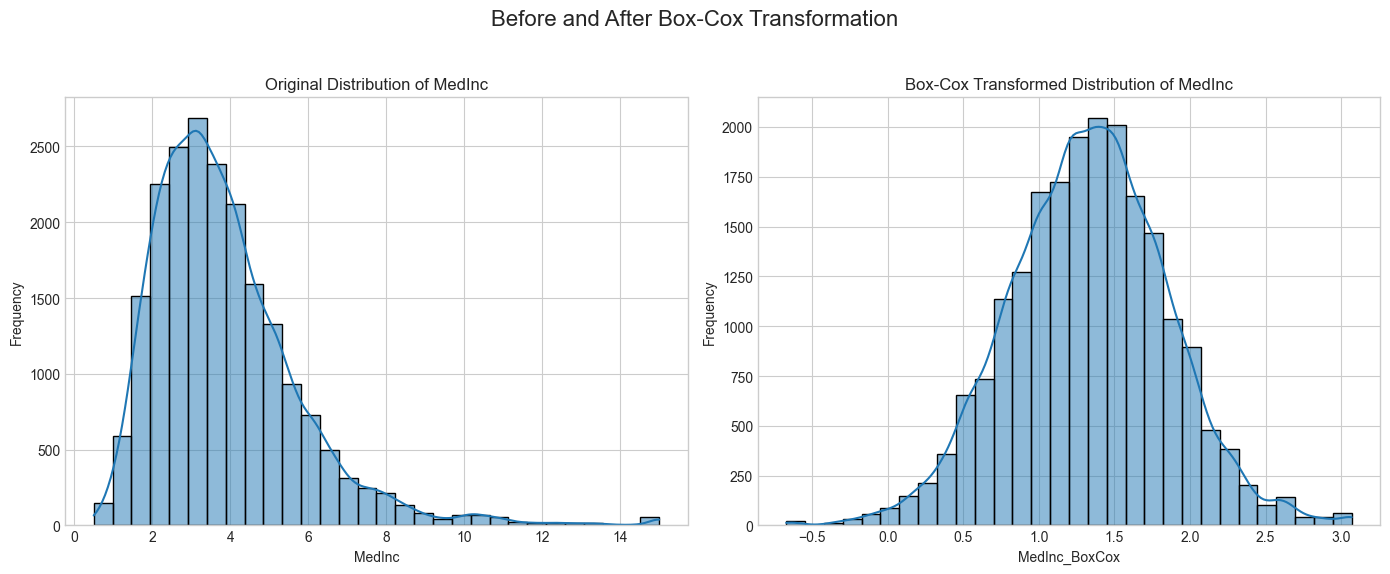

In [6]:
# 4. Show the result of applying the technique
# We'll create a before-and-after visualization to see the effect.

plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot original data
sns.histplot(df[feature_name], kde=True, ax=axes[0], bins=30)
axes[0].set_title(f'Original Distribution of {feature_name}')
axes[0].set_xlabel(feature_name)
axes[0].set_ylabel('Frequency')

# Plot transformed data
sns.histplot(df[transformed_feature_name], kde=True, ax=axes[1], bins=30)
axes[1].set_title(f'Box-Cox Transformed Distribution of {feature_name}')
axes[1].set_xlabel(transformed_feature_name)
axes[1].set_ylabel('Frequency')

plt.suptitle('Before and After Box-Cox Transformation', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()




In [7]:
# 5. Print the head of the resulting DataFrame
# This shows the original column alongside the new, transformed column.
print("\nDataFrame head with original and transformed data:")
print(df[[feature_name, transformed_feature_name]].head())


DataFrame head with original and transformed data:
   MedInc  MedInc_BoxCox
0  8.3252       2.337069
1  8.3014       2.333598
2  7.2574       2.171690
3  5.6431       1.873879
4  3.8462       1.432988
